In [2]:
import cv2
import PIL
import pathlib
import matplotlib.pyplot as plt

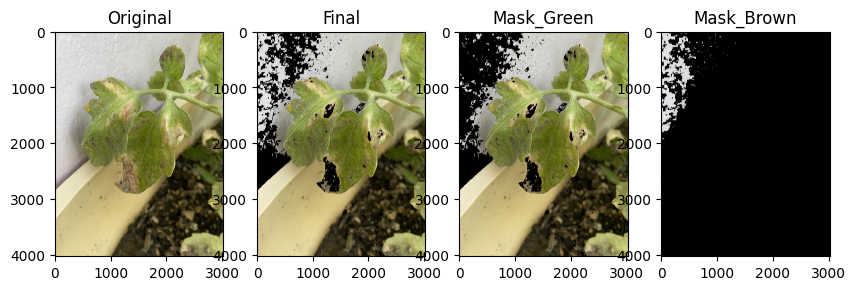

In [3]:
# path = '/notebooks/sample_data/IMG_4195.jpeg'
path = '/notebooks/sample_data/IMG_4196.jpeg'
# img_path = pathlib.Path(path)

img =  cv2.imread(path)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# find the green color 
# mask_green = cv2.inRange(hsv, (36,0,0), (86,255,255))
mask_green = cv2.inRange(hsv, (20,0,0), (86,255,255)) #or 5
# find the brown color
# mask_brown = cv2.inRange(hsv, (8, 60, 20), (30, 255, 200))
mask_brown = cv2.inRange(hsv, (70, 0, 0), (150, 255, 255))
# find the yellow color in the leaf
# mask_yellow = cv2.inRange(hsv, (21, 39, 64), (40, 255, 255))

#grey color
# mask_grey = cv2.inRange(hsv, (0,0,50), (360, 100, 100))

# find any of the three colors(green or brown or yellow) in the image
mask = cv2.bitwise_or(mask_green, mask_brown)
# mask = cv2.bitwise_or(mask, mask_yellow)


# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= mask)

# plt.imshow(mask_brown)

fig, axs = plt.subplots(1, 4, figsize=(10, 10))
axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(res)
axs[1].set_title('Final')
axs[2].imshow(cv2.bitwise_and(img,img, mask= mask_green))
axs[2].set_title('Mask_Green')
axs[3].imshow(cv2.bitwise_and(img,img, mask= mask_brown))
axs[3].set_title('Mask_Brown')
# axs[3].imshow(cv2.bitwise_and(img,img, mask= mask_yellow))

plt.show()

# cv2.imshow("original", img)
# cv2.imshow("final image", res)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

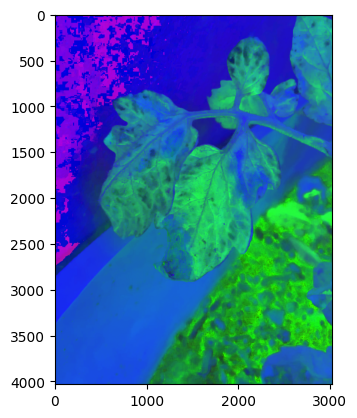

In [3]:
plt.imshow(hsv)

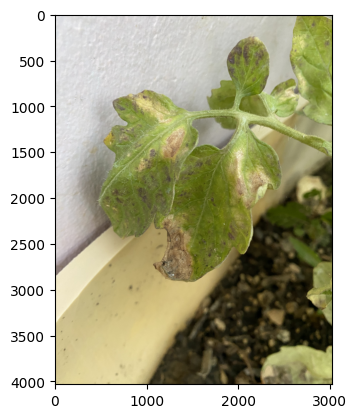

In [4]:
plt.imshow(img)

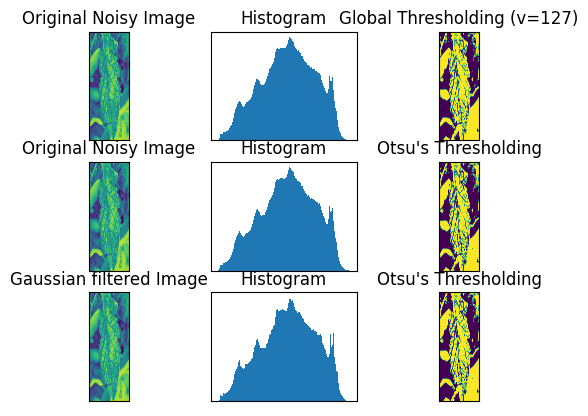

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread(path,0)
img = cv2.resize(img, (1500,img.shape[0]), interpolation = cv2.INTER_AREA)
# img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
# for i in range(3):
#     plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
#     plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
#     plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
#     plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
#     plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
#     plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3])
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2])
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

OTSU FOR HSV

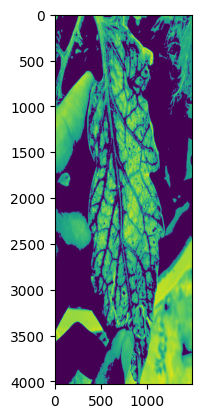

In [6]:
# create a masked image
img_original = cv.imread(path)
mask = cv.bitwise_and(img, img, mask=th3)

plt.imshow(mask)

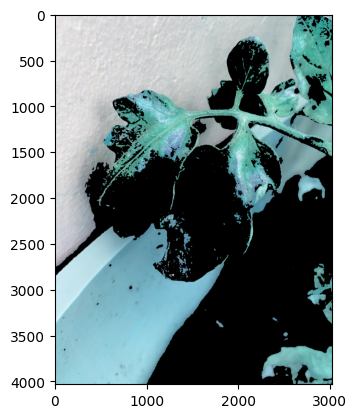

In [7]:
import cv2
import numpy as np

# Load the image
img = cv2.imread(path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to remove noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Threshold the image to create a binary mask
_, mask = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Apply morphological operations to clean up the mask
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# Find contours in the mask
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image for visualization
output = img.copy()

# Loop over the contours
for contour in contours:
    # Compute the bounding box for the contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Draw the bounding box on the output image
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
# Display the result
plt.imshow(mask)
mask = cv.bitwise_and(img_original, img_original, mask=closing)

plt.imshow(mask)



K MEANS CLUSTERING

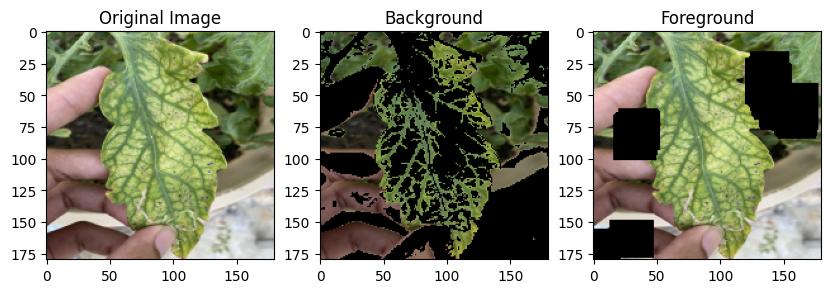

In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
path = '/notebooks/sample_data/IMG_4199.jpeg'
img = cv2.imread(path)
img = cv2.resize(img, (180,180), interpolation = cv2.INTER_AREA)

# hsv 
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Reshape image to 2D array of pixels
pixel_values = img.reshape((-1,3))

# Convert to float32
pixel_values = np.float32(pixel_values)

# Define k (number of clusters)
k = 2

# Define criteria and perform kmeans clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2) #or 10, 1.0
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8-bit
centers = np.uint8(centers)


# Reshape labels to original image shape
labels = labels.reshape((img.shape[0], img.shape[1]))

# Create mask for foreground and background
background_mask = (labels == 0)
foreground_mask = (labels == 1)

# dilation
kernel = np.ones((20,20),np.uint8)
foreground_mask = cv2.dilate(foreground_mask.astype(np.uint8),kernel,iterations = 1)
# erosion
kernel = np.ones((30,30),np.uint8)
foreground_mask = cv2.erode(foreground_mask,kernel,iterations = 1)


# other_mask = (labels == 2)
# other_mask_2 = (labels == 3)

# Apply masks to original image
background = cv2.bitwise_and(img, img, mask=background_mask.astype(np.uint8))
foreground = cv2.bitwise_and(img, img, mask=foreground_mask.astype(np.uint8))
# other = cv2.bitwise_and(img, img, mask=other_mask.astype(np.uint8))
# other2 = cv2.bitwise_and(img, img, mask=other_mask_2.astype(np.uint8))

# Plot original image, background, and foreground side by side
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB))
axs[0].set_title('Original Image')

axs[1].imshow(cv2.cvtColor(background, cv2.COLOR_HSV2RGB))
axs[1].set_title('Background')

axs[2].imshow(cv2.cvtColor(foreground, cv2.COLOR_HSV2RGB))
axs[2].set_title('Foreground')

# axs[3].imshow(cv2.cvtColor(other, cv2.COLOR_HSV2RGB))
# axs[3].set_title('Other')

# axs[4].imshow(cv2.cvtColor(other2, cv2.COLOR_HSV2RGB))
# axs[4].set_title('Other2')

plt.show()






Center Crop

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread(path)

# Crop center of image
h, w = img.shape[:2]
if h > w:
    offset = (h - w) // 2
    img = img[offset:offset+w, :, :]
else:
    offset = (w - h) // 2
    img = img[:, offset:offset+h, :]

# hsv 
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Reshape image to 2D array of pixels
pixel_values = img.reshape((-1,3))

# Convert to float32
pixel_values = np.float32(pixel_values)

# Define k (number of clusters)
k = 3

# Define criteria and perform kmeans clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8-bit
centers = np.uint8(centers)

# Reshape labels to original image shape
labels = labels.reshape((img.shape[0], img.shape[1]))

# Create mask for foreground and background
background_mask = (labels == 0)
foreground_mask = (labels == 1)
# other_mask = (labels == 2)
# other_mask_2 = (labels == 3)

# Apply masks to original image
background = cv2.bitwise_and(img, img, mask=background_mask.astype(np.uint8))
foreground = cv2.bitwise_and(img, img, mask=foreground_mask.astype(np.uint8))
# other = cv2.bitwise_and(img, img, mask=other_mask.astype(np.uint8))
# other2 = cv2.bitwise_and(img, img, mask=other_mask_2.astype(np.uint8))

# Plot original image, background, and foreground side by side
fig, axs = plt.subplots(1, 4, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB))
axs[0].set_title('Original Image')

axs[1].imshow(cv2.cvtColor(background, cv2.COLOR_HSV2RGB))
axs[1].set_title('Background')

axs[2].imshow(cv2.cvtColor(foreground, cv2.COLOR_HSV2RGB))
axs[2].set_title('Foreground')

axs[3].imshow(cv2.cvtColor(other, cv2.COLOR_HSV2RGB))
axs[3].set_title('Other')

# axs[4].imshow(cv2.cvtColor(other2, cv2.COLOR_HSV2RGB))
# axs[4].set_title('Other2')

plt.show()


MEAN SHIFT CLUSTERING

shape of labels : 14400
(5, 3)
number of estimated clusters : 5


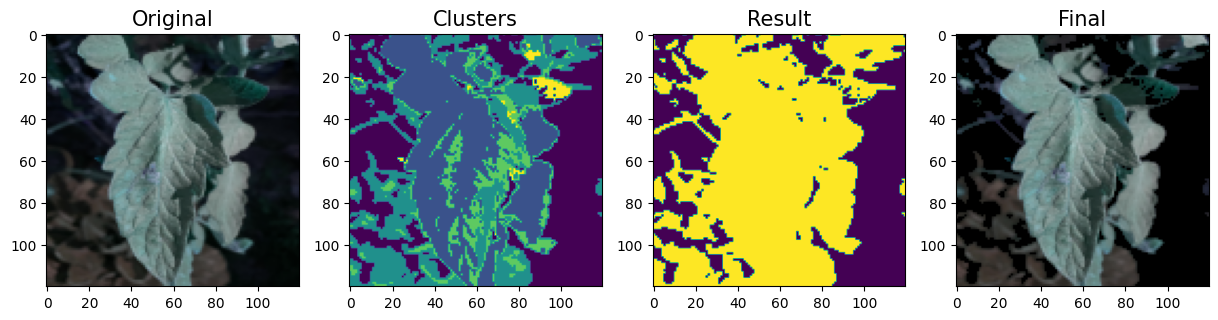

In [23]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from itertools import cycle
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import cv2
# %matplotlib inline

path = '/notebooks/sample_data/IMG_4150.jpeg'
img = cv2.imread(path)


img = cv2.resize(img, (120,120), interpolation = cv2.INTER_AREA)
original = img.copy()

# mask = cv2.inRange(cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:,:,1], 50, 200)
# img = cv2.bitwise_and(img, img, mask=mask)


# img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

img = np.array(img)

# saving the image shape
shape = img.shape



# reshaping image 
reshape_img = np.reshape(img, [-1, 3])



bandwidth = estimate_bandwidth(reshape_img, quantile=0.1, n_samples=100)
bandwidth

msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(reshape_img)

print("shape of labels : %d" % msc.labels_.shape)
print( msc.cluster_centers_.shape)
print("number of estimated clusters : %d" % len(np.unique(msc.labels_)))

labels = msc.labels_
result_image = np.reshape(labels, shape[:2])

clusters = result_image.copy()

_, result_image = cv2.threshold(result_image.astype(np.uint8), 0, 255, cv2.THRESH_BINARY)
# result_image = cv2.bitwise_and(img, img, mask=result_image.astype(np.uint8))

# # POSTPROCESSING
# result_image = cv2.dilate(result_image, np.ones((2,2),np.uint8), iterations = 1)
# result_image = cv2.erode(result_image, np.ones((9,9),np.uint8), iterations = 1)
# # mask1_opening = cv2.dilate(mask1_opening, np.ones((4,4),np.uint8), iterations = 1)
# # mask1_opening = cv2.erode(mask1_opening, np.ones((9,9),np.uint8), iterations = 1)


final = cv2.bitwise_and(original, original, mask=result_image)

# fig = plt.figure(3, figsize=(14, 12))
# ax = fig.add_subplot(121)
# ax = plt.imshow(img) 
# ax = fig.add_subplot(122)
# ax = plt.imshow(clusters)  
# ax = fig.add_subplot(123)
# ax = plt.imshow(result_image)  
# plt.show()

fig, ax = plt.subplots(1, 4, figsize=(15,5))
ax[0].imshow(original)
ax[0].set_title('Original',fontsize=15)
ax[1].imshow(clusters)
ax[1].set_title('Clusters',fontsize=15)
ax[2].imshow(result_image)
ax[2].set_title('Result',fontsize=15);
ax[3].imshow(final)
ax[3].set_title('Final',fontsize=15);
plt.show()

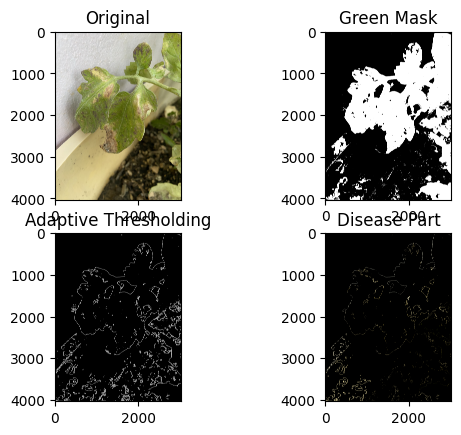

In [164]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(path)

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the range of green color in HSV
lower_green = np.array([25, 40, 50])
upper_green = np.array([85, 255, 255])

# Threshold the image to get only green color
mask = cv2.inRange(hsv_img, lower_green, upper_green)

# Apply a Gaussian blur to the mask to remove noise
mask = cv2.GaussianBlur(mask, (5, 5), 0)

# Apply adaptive thresholding to the mask to separate the foreground (disease) and background (healthy)
adaptive_mask = cv2.adaptiveThreshold(mask, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Apply morphology operations to the adaptive mask to remove small noise and fill in holes in the foreground
kernel = np.ones((5, 5), np.uint8)
morph_mask = cv2.morphologyEx(adaptive_mask, cv2.MORPH_OPEN, kernel)
morph_mask = cv2.morphologyEx(morph_mask, cv2.MORPH_CLOSE, kernel)

# Apply the mask to the original image to extract the disease part of the leaf
disease_part = cv2.bitwise_and(img, img, mask=morph_mask)

# Display the results
plt.subplot(2, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Original")
plt.subplot(2, 2, 2), plt.imshow(mask, cmap="gray"), plt.title("Green Mask")
plt.subplot(2, 2, 3), plt.imshow(adaptive_mask, cmap="gray"), plt.title("Adaptive Thresholding")
plt.subplot(2, 2, 4), plt.imshow(cv2.cvtColor(disease_part, cv2.COLOR_BGR2RGB)), plt.title("Disease Part")
plt.show()


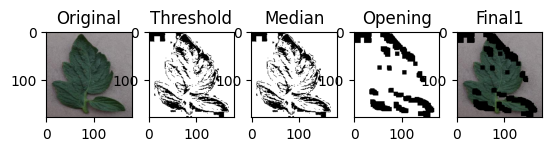

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Read the image
# path = '/notebooks/sample_data/IMG_4199.jpeg'
path = '/notebooks/dataset/train/Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'
img = cv2.imread(path)
originalshape = img
# img = cv2.resize(img, (1500,originalshape.shape[0]), interpolation = cv2.INTER_AREA)
img = cv2.resize(img, (180,180), interpolation = cv2.INTER_AREA)

# print(img.shape)
# plt.imshow(img)

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# mask1 = cv2.inRange(hsv_img[:,:,0], 15, 160) #hue
# mask2 = cv2.inRange(hsv_img[:,:,1], 50, 255) #sat
# mask3 = cv2.inRange(hsv_img[:,:,2], 50, 200) #val

# mask1 = cv2.bitwise_and(mask2, mask2, mask=mask1)
# mask1 = cv2.bitwise_and(mask1, mask1, mask=mask3)

# mask1 = cv2.inRange(hsv_img[:,:,2], 130, 230)
mask1 = cv2.inRange(hsv_img, (20,0,60), (195,255,230))

# median filter
mask1_median = cv2.medianBlur(mask1, 1)

# morphological opening
# kernel = np.ones((20,20),np.uint8)
# kernel = np.ones((5,5),np.uint8)
# mask1_opening = cv2.erode(mask1_median,kernel,iterations = 1)
# mask1_opening = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, kernel, iterations=1)
mask1_opening = cv2.dilate(mask1_median, np.ones((3,3),np.uint8), iterations = 1)
mask1_opening = cv2.erode(mask1_opening, np.ones((3,3),np.uint8), iterations = 1)
mask1_opening = cv2.dilate(mask1_opening, np.ones((4,4),np.uint8), iterations = 1)
mask1_opening = cv2.erode(mask1_opening, np.ones((9,9),np.uint8), iterations = 1)
# mask1_opening = cv2.dilate(mask1_opening, np.ones((3,3),np.uint8), iterations = 1)




final1 = cv2.bitwise_and(img, img, mask=mask1_opening)

plt.subplot(1, 5, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Original")
plt.subplot(1, 5, 2), plt.imshow(mask1, cmap="gray"), plt.title("Threshold")
plt.subplot(1, 5, 3), plt.imshow(mask1_median, cmap="gray"), plt.title("Median")
plt.subplot(1, 5, 4), plt.imshow(mask1_opening, cmap="gray"), plt.title("Opening")
plt.subplot(1, 5, 5), plt.imshow(cv2.cvtColor(final1, cv2.COLOR_BGR2RGB), ), plt.title("Final1")
plt.show()

# plt.imshow(mask1)

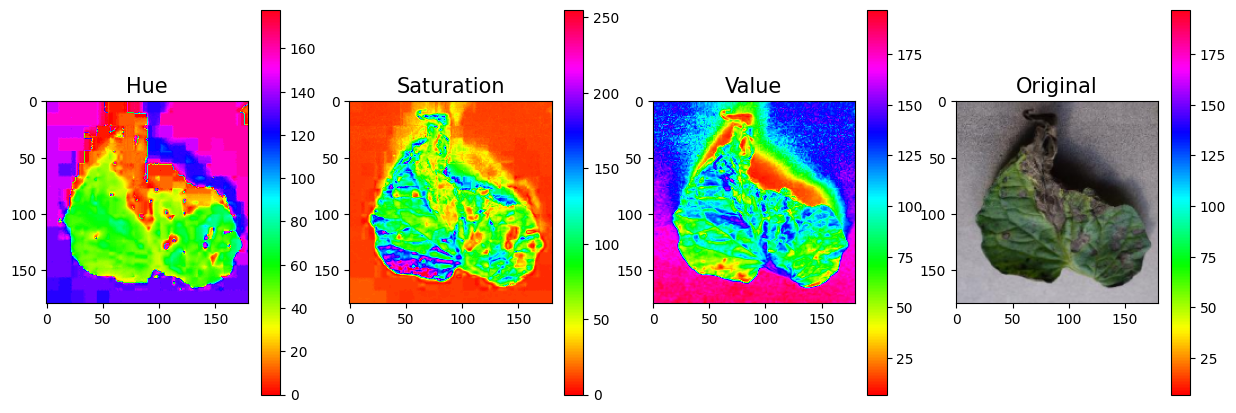

In [6]:
import cv2

# path = '/notebooks/sample_data/IMG_4195.jpeg'
img = cv2.imread(path)
img = cv2.resize(img, (180,180), interpolation = cv2.INTER_AREA)
sample = img
sample_h = cv2.cvtColor(sample, cv2.COLOR_BGR2HSV)
# sample_h = rgb2hsv(sample)

#graph per HSV Channel
fig, ax = plt.subplots(1, 4, figsize=(15,5))
im = ax[0].imshow(sample_h[:,:,0],cmap='hsv')
fig.colorbar(im,ax=ax[0])
im = ax[1].imshow(sample_h[:,:,1],cmap='hsv')
fig.colorbar(im,ax=ax[1])
im = ax[2].imshow(sample_h[:,:,2],cmap='hsv')
fig.colorbar(im,ax=ax[2])
fig.colorbar(im,ax=ax[3])

ax[0].imshow(sample_h[:,:,0], cmap='hsv')
ax[0].set_title('Hue',fontsize=15)
ax[1].imshow(sample_h[:,:,1], cmap='hsv')
ax[1].set_title('Saturation',fontsize=15)
ax[2].imshow(sample_h[:,:,2], cmap='hsv')
ax[2].set_title('Value',fontsize=15);
ax[3].imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
ax[3].set_title('Original',fontsize=15);
plt.show()

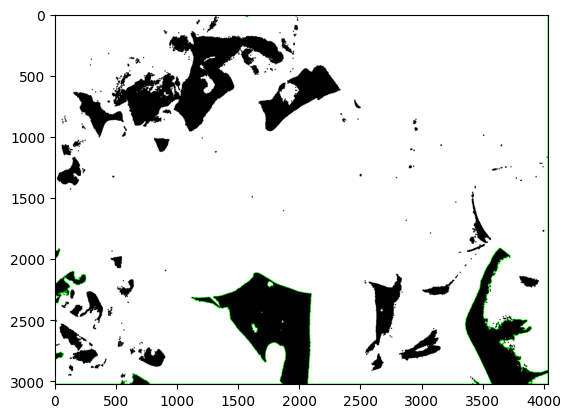

In [107]:
from matplotlib import pyplot as plt
import cv2
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
# image = cv2.resize(image, (180,180), interpolation = cv2.INTER_AREA)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_ , mask = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)
mask = cv2.erode(mask, np.ones((9, 9), np.uint8))
# plt.imshow(mask, cmap = "gray")
# plt.axis('off')
# cv2.imwrite('thresholding.png', cv2.hconcat([image, np.stack((mask, mask, mask), axis=2)]))

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_img_before_filtering = mask.copy()
contours_img_before_filtering = cv2.cvtColor(contours_img_before_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_before_filtering, contours, -1, (0, 255, 0), 3)
# plt.imshow(contours_img_before_filtering)
# plt.axis('off')

filtered_contours = []
df_mean_color = pd.DataFrame()
for idx, contour in enumerate(contours):
    area = int(cv2.contourArea(contour))

    # if area is higher than 3000:
    if area > 1000:
        filtered_contours.append(contour)
        # get mean color of contour:
        masked = np.zeros_like(image[:, :, 0])  # This mask is used to get the mean color of the specific bead (contour), for kmeans
        cv2.drawContours(masked, [contour], 0, 255, -1)

        B_mean, G_mean, R_mean, _ = cv2.mean(image, mask=masked)
        df = pd.DataFrame({'B_mean': B_mean, 'G_mean': G_mean, 'R_mean': R_mean}, index=[idx])
        df_mean_color = pd.concat([df_mean_color, df])

df_mean_color.head()

contours_img_after_filtering = mask.copy()
contours_img_after_filtering = cv2.cvtColor(contours_img_after_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_after_filtering, tuple(filtered_contours), -1, (0, 255, 0), 3)

plt.imshow(contours_img_after_filtering)
# plt.axis('off')